##CASE 1##
Open the TFP.csv file attached.

The series is composed by TFP (rtfpna variable) at constant national prices (2005 = 1) for three countries: United States (USA), Canada (CAN) and Mexico (MEX).

Make an exploratory data analysis;

Forecast 10 years of the series (if you are performing the exercise in R, use package “forecast”);

Check in the following link pages 2 and 3: https://cran.r-project.org/web/packages/pwt8/pwt8.pdf to see a list of all variables in the original dataset. Can you think about another feature that could be helpful in explaining TFP series? Explain.

#1)  Make an exploratory data analysis#

In [145]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
tfp_data=pd.read_csv("TFP.csv")
tfp_usa=tfp_data[tfp_data['isocode']=='USA']
tfp_mex=tfp_data[tfp_data['isocode']=='MEX']
tfp_can=tfp_data[tfp_data['isocode']=='CAN']

In [3]:
tfp_can

,isocode,year,rtfpna
62,CAN,1950,0.843335
63,CAN,1951,0.855123
64,CAN,1952,0.896489
65,CAN,1953,0.910658
66,CAN,1954,0.875178
...,...,...,...
119,CAN,2007,0.981433
120,CAN,2008,0.958357
121,CAN,2009,0.926482
122,CAN,2010,0.932567


##Finding correlation patterns between data##

Defintelly not linear , so maybe an ANN  deals with  predicting USA data regarding MEX data, also the same situacion between USA and Canada. Otherwise MEX and Canada got a more linearly relationship.

In [4]:
fig1=px.scatter(x=tfp_usa.rtfpna,y=tfp_mex.rtfpna,labels={'x':'USA','y':'MEX'},title='USAvsMEX')
fig1.show()

In [5]:
fig2=px.scatter(x=tfp_usa.rtfpna,y=tfp_can.rtfpna,labels={'x':'USA','y':'CANADA'},title='USAvsCAN')
fig2.show()

In [6]:
fig3=px.scatter(x=tfp_mex.rtfpna,y=tfp_can.rtfpna,labels={'x':'MEX','y':'CANADA'},title='MEXvsCAN')
fig3.show()

##Plotting Time series## 

In [7]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=tfp_usa.year,y=tfp_usa.rtfpna,mode='lines',name='USA'))
fig.add_trace(go.Scatter(x=tfp_usa.year,y=tfp_mex.rtfpna,mode='lines',name='MEX'))
fig.add_trace(go.Scatter(x=tfp_usa.year,y=tfp_can.rtfpna,mode='lines',name='CANADA'))
fig.show()

##Checking autocorrelation plots for each country##

USA,MEXICO,and,CANADA are not stationary series accordin to Dick-Fuller's test

In [226]:
from statsmodels.tsa.stattools import adfuller

In [222]:
def check_stationality(series):
  div=round(len(series)/2)
  x1,x2=series[0:div],series[div:]
  mean1,mean2=x1.mean(),x2.mean()
  var1,var2=x1.var(),x2.var()
  print("mean1: ",mean1,"mean2: ",mean2)
  print("var1: ",mean1,"var2: ",mean2)
  series.hist()


#USA#

mean1:  0.7128201319325355 mean2:  0.8948273889480098
var1:  0.7128201319325355 var2:  0.8948273889480098


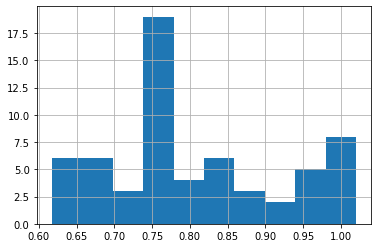

In [223]:

check_stationality(tfp_usa.rtfpna)


In [227]:
result=adfuller(tfp_usa.rtfpna)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.223647
p-value: 0.973557


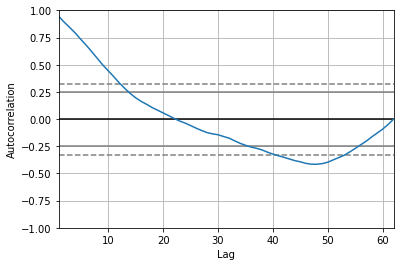

In [8]:
autocorrelation_plot(tfp_usa.rtfpna)

at Lag 11 autocorrelation is positive and its close to de critical boundaries. so it's a good start for AR value. Finally parameter was set to 10 due to convergence problems.

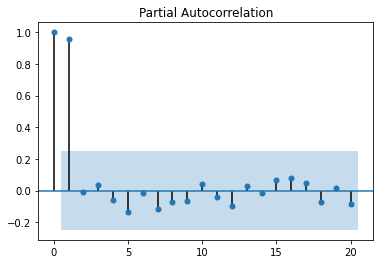

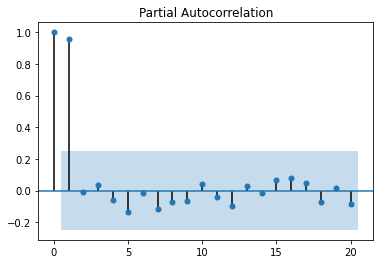

In [261]:
plot_pacf(tfp_usa.rtfpna,lags=20)

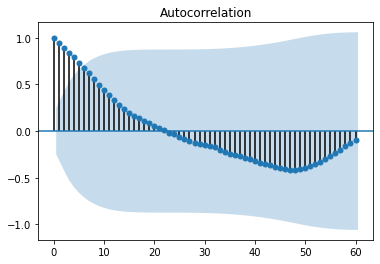

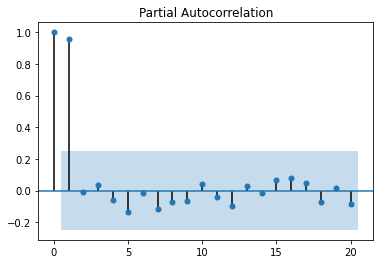

In [179]:
import statsmodels.api as sm
fig=sm.graphics.tsa.plot_acf(tfp_usa.rtfpna,lags=60)
fig2=sm.graphics.tsa.plot_pacf(tfp_usa.rtfpna,lags=20)

#Mexico#

mean1:  1.1890811631756444 mean2:  1.071183354623856
var1:  1.1890811631756444 var2:  1.071183354623856


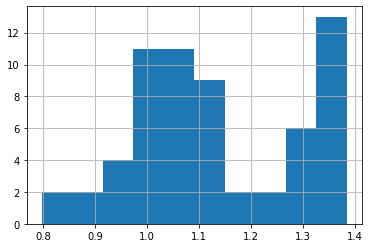

In [224]:
check_stationality(tfp_mex.rtfpna)

In [228]:
result=adfuller(tfp_usa.rtfpna)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.223647
p-value: 0.973557


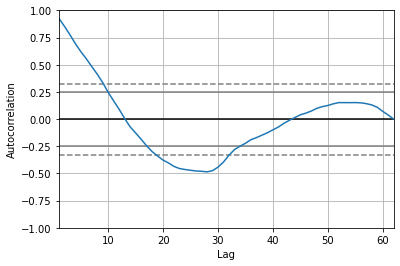

In [9]:
autocorrelation_plot(tfp_mex.rtfpna)

at Lag 10 autocorrelation is positive and its close to de critical boundaries. so it's a good start for AR value

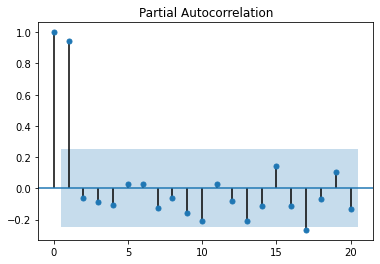

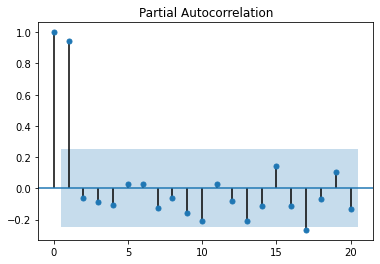

In [180]:
plot_pacf(tfp_mex.rtfpna,lags=20)

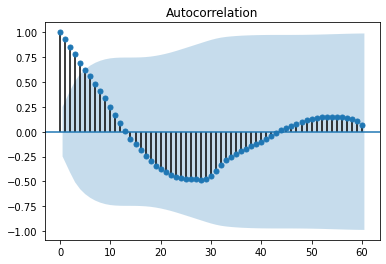

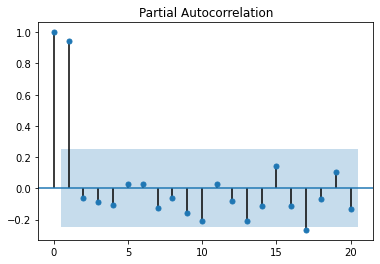

In [177]:
fig=sm.graphics.tsa.plot_acf(tfp_mex.rtfpna,lags=60)
fig2=sm.graphics.tsa.plot_pacf(tfp_mex.rtfpna,lags=20)

#Canada#

mean1:  0.9830250047868297 mean2:  1.002746868518091
var1:  0.9830250047868297 var2:  1.002746868518091


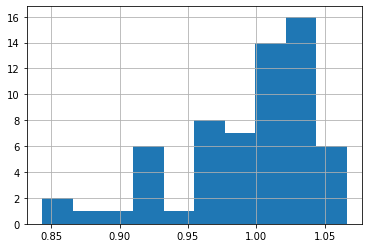

In [225]:
check_stationality(tfp_can.rtfpna)

In [229]:
result=adfuller(tfp_usa.rtfpna)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.223647
p-value: 0.973557


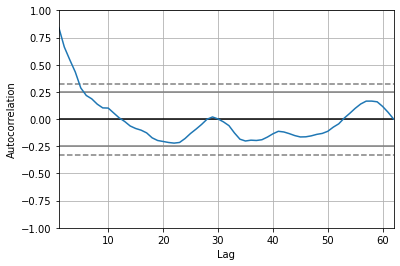

In [10]:
autocorrelation_plot(tfp_can.rtfpna)

at Lag 5 autocorrelation is positive and its close to de critical boundaries. so it's a good start for AR value

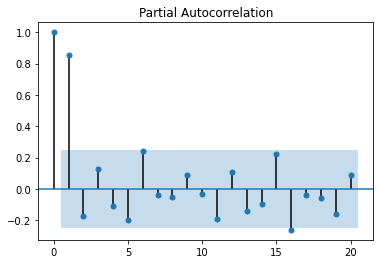

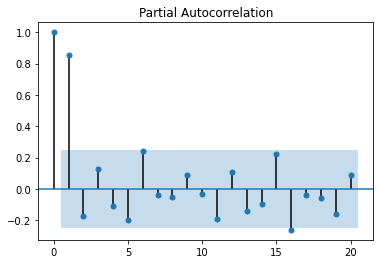

In [178]:
plot_pacf(tfp_can.rtfpna,lags=20)

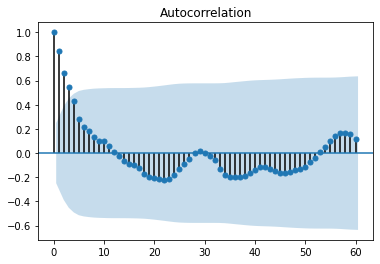

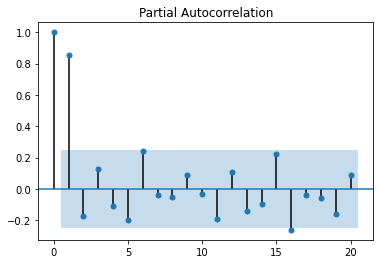

In [176]:
fig=sm.graphics.tsa.plot_acf(tfp_can.rtfpna,lags=60)
fig2=sm.graphics.tsa.plot_pacf(tfp_can.rtfpna,lags=20)

For each series , MA item could be between 0 and  2 due partial autocorrelation plot.

#Trying ARIMA Model using USA data as exploratory data#

In [14]:

from statsmodels.tsa.arima_model import ARIMA


usa_model=ARIMA(tfp_usa.rtfpna,order=(10,1,0))
usa_fit=usa_model.fit()
print(usa_fit.summary())


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                             ARIMA Model Results                              
Dep. Variable:               D.rtfpna   No. Observations:                   61
Model:                ARIMA(10, 1, 0)   Log Likelihood                 189.250
Method:                       css-mle   S.D. of innovations              0.011
Date:                Fri, 18 Dec 2020   AIC                           -354.501
Time:                        19:27:08   BIC                           -329.170
Sample:                             1   HQIC                          -344.573
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0066      0.001      5.084      0.000       0.004       0.009
ar.L1.D.rtfpna      0.0080      0.127      0.063      0.950      -0.241       0.257
ar.L2.D.rtfpna     -0.0005      

#Checking outputs#

In [71]:
out=usa_fit.forecast()
out

(array([1.02633827]), array([0.01082171]), array([[1.00512811, 1.04754842]]))

#Residual errors for USA data#

In [58]:
res=usa_fit.resid
fig=px.line(y=res)
fig.show()
print(res.describe())

count    61.000000
mean      0.000011
std       0.010961
min      -0.026083
25%      -0.008522
50%       0.002156
75%       0.006738
max       0.016380
dtype: float64


In [32]:
def country_model(train,test,arima_order):
  preds=[]
  for i in range(len(test)):
    model=ARIMA(train,arima_order)
    m_fit=model.fit()
    out=m_fit.forecast()
    yhat=out[0]
    preds.append(yhat)
    obs=test[i]
    train.append(obs)
    print("real: ",obs,"pred: ",yhat)
  return preds,m_fit
    




In [36]:
def plot_results(time_data,real_data,predict_data,country):
  fig=go.Figure()
  preds=[x[0] for x in predict_data]
  fig.add_trace(go.Scatter(x=time_data,y=real_data,mode='lines',name=country))
  fig.add_trace(go.Scatter(x=time_data,y=preds,mode='lines',name='PRED'))
  fig.update_layout(title='rmse'+str(math.sqrt(mean_squared_error(real_data,preds))))
  fig.show()


#Testing Arima approach#

#USA#

In [51]:
import math
from sklearn.metrics import mean_squared_error
y_train_usa,y_test_usa=tfp_usa.rtfpna[0:int(0.7*len(tfp_usa))],tfp_usa.rtfpna[int(0.7*len(tfp_usa)):]
y_train_usa=[y_t for y_t in y_train_usa]
y_test_usa=[y_t for y_t in y_test_usa]
order=(10,1,0)
predictions_usa,usa_model=country_model(y_train_usa,y_test_usa,order)
t=tfp_usa.year[int(0.7*len(tfp_usa)):]
plot_results(t,y_test_usa,predictions_usa,'USA')

real:  0.8543828725814819 pred:  [0.84530345]
real:  0.8667795658111572 pred:  [0.85533913]
real:  0.869562566280365 pred:  [0.86948437]
real:  0.8842038512229919 pred:  [0.87523152]
real:  0.9001898765563965 pred:  [0.88786368]
real:  0.9189171791076659 pred:  [0.90354948]
real:  0.9413750767707824 pred:  [0.92480734]
real:  0.9594316482543944 pred:  [0.9482439]
real:  0.9578253030776978 pred:  [0.96794448]
real:  0.9669165611267091 pred:  [0.9629841]
real:  0.975909948348999 pred:  [0.97484918]
real:  0.9920576810836792 pred:  [0.98602881]
real:  1.0 pred:  [0.99904256]
real:  1.0040003061294556 pred:  [1.00708502]
real:  1.006595253944397 pred:  [1.00905428]
real:  0.9984992742538452 pred:  [1.01055915]
real:  0.9867377877235411 pred:  [1.00373097]
real:  1.00946307182312 pred:  [0.99238296]
real:  1.020391821861267 pred:  [1.01788141]


#Mexico#

In [52]:
y_train_mex,y_test_mex=tfp_mex.rtfpna[0:int(0.7*len(tfp_mex))],tfp_mex.rtfpna[int(0.7*len(tfp_mex)):]
y_train_mex=[y_t for y_t in y_train_mex]
y_test_mex=[y_t for y_t in y_test_mex]

order=(10,1,0)
predictions_mex,mex_model=country_model(y_train_mex,y_test_mex,order)
t=tfp_usa.year[int(0.7*len(tfp_usa)):]
plot_results(t,y_test_mex,predictions_mex,'MEX')

real:  1.0781174898147583 pred:  [1.13394904]
real:  1.0766171216964722 pred:  [1.03857922]
real:  1.0050045251846311 pred:  [1.08252478]
real:  1.023274302482605 pred:  [0.97832682]
real:  1.0445234775543213 pred:  [1.02558819]
real:  1.0514060258865356 pred:  [1.05558658]
real:  1.0501482486724854 pred:  [1.03808189]
real:  1.0727753639221191 pred:  [1.07071607]
real:  1.0367354154586792 pred:  [1.05366972]
real:  1.0050327777862549 pred:  [1.03697338]
real:  0.9912721514701844 pred:  [0.99557635]
real:  0.9949626922607422 pred:  [0.97770413]
real:  1.0 pred:  [1.00059919]
real:  1.01175057888031 pred:  [1.01672874]
real:  1.0136733055114746 pred:  [1.00455758]
real:  0.9915478229522704 pred:  [1.01498836]
real:  0.9158785343170166 pred:  [0.98506272]
real:  0.941603660583496 pred:  [0.88237204]
real:  0.955765664577484 pred:  [0.95073854]


#Canada#

In [54]:
y_train_can,y_test_can=tfp_can.rtfpna[0:int(0.7*len(tfp_can))],tfp_can.rtfpna[int(0.7*len(tfp_can)):]
y_train_can=[y_t for y_t in y_train_can]
y_test_can=[y_t for y_t in y_test_can]

order=(10,1,0)
predictions_can,can_model=country_model(y_train_can,y_test_can,order)
t=tfp_usa.year[int(0.7*len(tfp_usa)):]
plot_results(t,y_test_can,predictions_can,'CAN')

real:  0.9845812916755676 pred:  [0.9871029]
real:  1.0047389268875122 pred:  [0.98598365]
real:  1.0084209442138672 pred:  [1.01253011]
real:  1.0057704448699951 pred:  [1.01134696]
real:  1.0173662900924685 pred:  [1.00531297]
real:  1.0255228281021118 pred:  [1.02701021]
real:  1.0469565391540527 pred:  [1.02237572]
real:  1.0661041736602783 pred:  [1.05821698]
real:  1.05035400390625 pred:  [1.07422253]
real:  1.0394744873046875 pred:  [1.03993498]
real:  1.0165166854858398 pred:  [1.05008073]
real:  1.008692502975464 pred:  [1.00829652]
real:  1.0 pred:  [1.01360309]
real:  0.99513179063797 pred:  [1.00523785]
real:  0.9814327955245972 pred:  [0.99413598]
real:  0.9583569765090942 pred:  [0.98104558]
real:  0.9264822006225586 pred:  [0.95577946]
real:  0.9325665831565856 pred:  [0.91856558]
real:  0.929405391216278 pred:  [0.94465502]


#2)Forecast 10 years of the series (if you are performing the exercise in R, use package “forecast”);#

In [272]:
def model_predict(data,years_vector,order):
  pred=[]
  for i in next_years:
    model=ARIMA(data,order)
    model_fit=model.fit()
    out=model_fit.forecast()
    pred.append(out[0])
    data.append(out[0][0])
    print(i ," ",out[0][0])
  pred=[p[0] for p in pred]
  return data,pred
  
  



In [279]:
next_years=list(range(2012,2022))
usa_data=[x for x in tfp_usa.rtfpna]
mex_data=[x for x in tfp_mex.rtfpna]
can_data=[x for x in tfp_can.rtfpna]
print(len(usa_data),len(mex_data),len(can_data))
print("--USA predictions--")
usa_tenyears,usa_predictions=model_predict(usa_data,next_years,(10,1,0))
print("--MEXICO predictions--")
mex_tenyears,mex_predictions=model_predict(mex_data,next_years,(10,1,0))
print("--CANADA predictions--")
can_tenyears,can_predictions=model_predict(can_data,next_years,(5,1,0))

62 62 62
--USA predictions--
2012   1.026338267784312
2013   1.0267090600689381
2014   1.0319629212542738
2015   1.0377107696616283
2016   1.0446678859614378
2017   1.056370828139801
2018   1.0673758735023338
2019   1.0715825677062967
2020   1.0748953935277867
2021   1.0813128359627358
--MEXICO predictions--
2012   0.9515201092264044
2013   0.9462216330279261
2014   0.9614553290014073
2015   0.9402452046334687
2016   0.9405696610326783
2017   0.9296646634946716
2018   0.9211110804250274
2019   0.9257181570462159
2020   0.9390152243472843
2021   0.9289593400755907
--CANADA predictions--
2012   0.9214685791830473
2013   0.9268692896787507
2014   0.9344280196156521
2015   0.9338677492583258
2016   0.9348441095565965
2017   0.9391373944910457
2018   0.94027632758513
2019   0.9399954465826162
2020   0.9418919177646189
2021   0.9437254332947035


In [285]:
full_time=list(range(1950,2022))
fig=go.Figure()
fig.add_trace(go.Scatter(x=full_time,y=usa_tenyears,mode='lines',name='USA'))
fig.add_trace(go.Scatter(x=next_years,y=usa_predictions,mode='lines+markers',name='USA 10 years'))
fig.add_trace(go.Scatter(x=full_time,y=mex_tenyears,mode='lines',name='MEXICO'))
fig.add_trace(go.Scatter(x=next_years,y=mex_predictions,mode='lines+markers',name='MEXICO 10 years'))
fig.add_trace(go.Scatter(x=full_time,y=can_tenyears,mode='lines',name='CANADA'))
fig.add_trace(go.Scatter(x=next_years,y=can_predictions,mode='lines+markers',name='CANADA 10 years'))
fig.show()


In [284]:
final_data={'year':next_years,'USA':usa_predictions,'MEXICO':mex_predictions,'CANADA':can_predictions}
df=pd.DataFrame(final_data,columns=['year','USA','MEXICO','CANADA'])
df.to_csv('predictions.csv')